<a href="https://colab.research.google.com/github/mdikas/final-project-zenius-data-analyst/blob/main/Improved_Final_Project_Zenius_Data_Analysis_Kelompok_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler ,TomekLinks
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve,precision_recall_curve

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSIB/Dataset/transactions.csv')

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Understanding

In [7]:
# preview the dataset

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [8]:
# view summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [9]:
# Check missing values

df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

In [10]:
# view dimensions of dataset

df.shape

(641914, 29)

Explore Categorical Variables

In [11]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

9 categorical variables



In [12]:
print('The categorical variables are :', categorical)

The categorical variables are : ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


In [13]:
# find boolean variables

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

3 boolean variables



In [14]:
print('The boolean variables are :', boolean)

The boolean variables are : ['isFraud', 'cardPresent', 'expirationDateKeyInMatch']


In [15]:
# View the number of labels for each categorical variable

for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

transactionDateTime  contains  635472  labels
merchantName  contains  2493  labels
acqCountry  contains  5  labels
merchantCountryCode  contains  5  labels
merchantCategoryCode  contains  19  labels
currentExpDate  contains  165  labels
accountOpenDate  contains  1826  labels
dateOfLastAddressChange  contains  2186  labels
transactionType  contains  4  labels


Summary of categorical variables

* There are a total of 12 variables.
* There are 5 categorical variables (merchantName, acqCountry, merchantCountryCode, merchantCategoryCode, and transactionType).
* There are 4 date variables (transactionDateTime, currentExpDate, accountOpenDate, and dateOfLastAddressChange).
* There are 3 binary variables (isFraud, cardPresent, and expirationDateKeyInMatch.
* isFraud is the target variable.




Explore Numerical Variables

In [16]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

17 numerical variables



In [17]:
# view the numerical variables

df[numerical].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
0,733493772,733493772,5000,5000.00,111.33,5.0,1.0,492,492,9184,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1,733493772,733493772,5000,4888.67,24.75,9.0,1.0,492,492,9184,NaN,111.33,NaN,NaN,NaN,NaN,NaN
2,733493772,733493772,5000,4863.92,187.40,5.0,1.0,492,492,9184,NaN,136.08,NaN,NaN,NaN,NaN,NaN
3,733493772,733493772,5000,4676.52,227.34,2.0,1.0,492,492,9184,NaN,323.48,NaN,NaN,NaN,NaN,NaN
4,733493772,733493772,5000,4449.18,0.00,2.0,1.0,492,492,9184,NaN,550.82,NaN,NaN,NaN,NaN,NaN


Summary of numerical variables

* There are 11 numerical variables
* These are given by, accountNumber, customerId, creditLimit, availableMoney, transactionAmount, posEntryMode, posConditionCode, cardCVV, enteredCVV, cardLast4Digits, and currentBalance.

# Exploratory Data Analysis

### Visualization

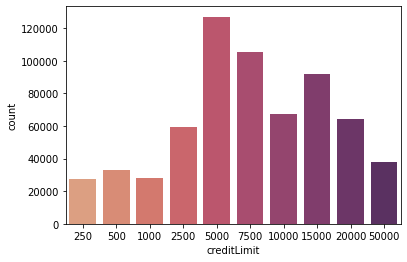

In [18]:
sns.countplot(df['creditLimit'].sort_values().astype(str),palette="flare")

Most of the Credit Cards have 5000 as their limit, on second number it is 7500.

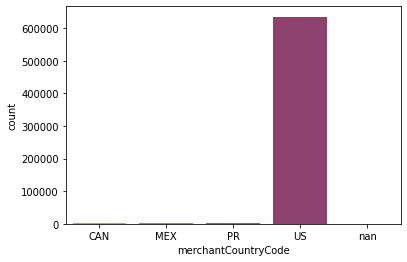

In [19]:
sns.countplot(df['merchantCountryCode'].sort_values().astype(str),palette="flare")

4 Types of Merchant Country Code, where US is a dominant entity as shown.

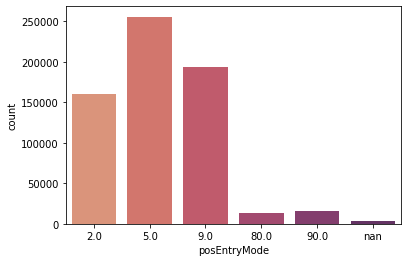

In [20]:
sns.countplot(df['posEntryMode'].sort_values().astype(str),palette="flare")

5 POS Entry Mode where “05”, “09”, and “02” covers most of the values

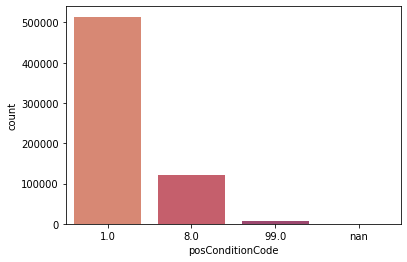

In [21]:
sns.countplot(df['posConditionCode'].sort_values().astype(str),palette="flare")

3 POS Condition Mode exists where “01” is dominant among all


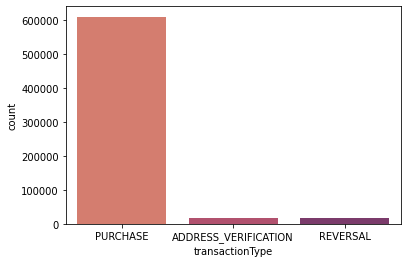

In [22]:
sns.countplot(df['transactionType'],palette="flare")

There are 3 transaction types, where purchase type is the most dominant.

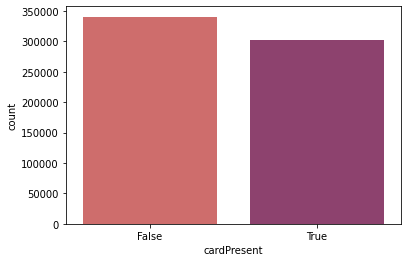

In [23]:
sns.countplot(df['cardPresent'].astype(str),palette="flare")

If card is Present during the transaction.

[Text(0, 0, 'Lyft'),
 Text(0, 0, 'Uber'),
 Text(0, 0, 'gap.com'),
 Text(0, 0, 'apple.com'),
 Text(0, 0, 'target.com'),
 Text(0, 0, 'alibaba.com'),
 Text(0, 0, 'staples.com'),
 Text(0, 0, 'amazon.com'),
 Text(0, 0, 'ebay.com'),
 Text(0, 0, 'discount.com')]

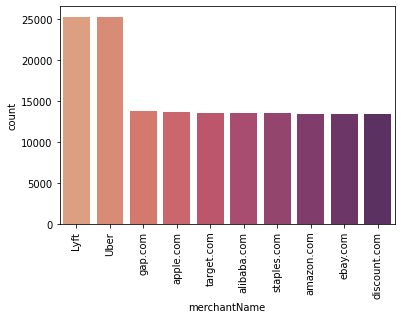

In [24]:
ax = sns.countplot(df['merchantName'], palette="flare", order=df['merchantName'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Merchant by count

[Text(0, 0, 'online_retail'),
 Text(0, 0, 'fastfood'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'food'),
 Text(0, 0, 'rideshare'),
 Text(0, 0, 'online_gifts'),
 Text(0, 0, 'hotels'),
 Text(0, 0, 'fuel'),
 Text(0, 0, 'subscriptions'),
 Text(0, 0, 'personal care')]

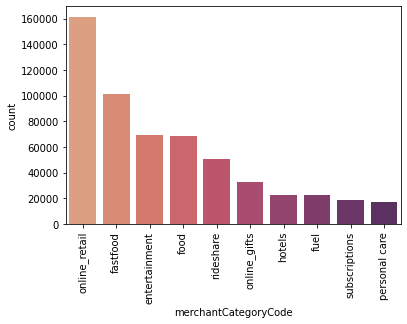

In [25]:
ax = sns.countplot(df['merchantCategoryCode'], palette="flare", order=df['merchantCategoryCode'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Category

Histogram numerical variables

Text(0, 0.5, 'Count')

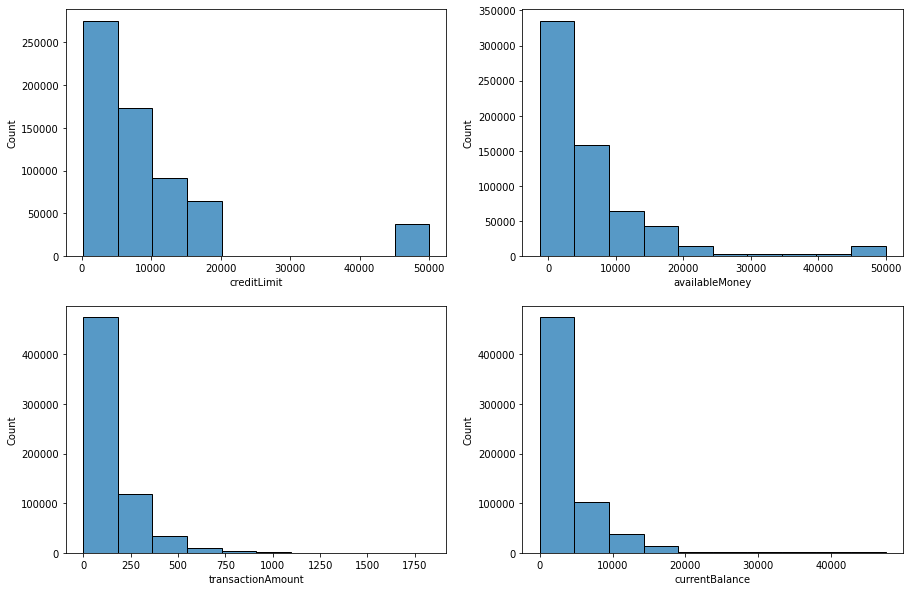

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.histplot(df['creditLimit'],bins=10)
fig.set_xlabel('creditLimit')
fig.set_ylabel('Count')

plt.subplot(2, 2, 2)
fig = sns.histplot(df['availableMoney'],bins=10)
fig.set_xlabel('availableMoney')
fig.set_ylabel('Count')

plt.subplot(2, 2, 3)
fig = sns.histplot(df['transactionAmount'],bins=10)
fig.set_xlabel('transactionAmount')
fig.set_ylabel('Count')

plt.subplot(2, 2, 4)
fig = sns.histplot(df['currentBalance'],bins=10)
fig.set_xlabel('currentBalance')
fig.set_ylabel('Count')

These Numerical Atrributes are Right Skewed

Boxplot numerical variables

Text(0.5, 1.0, 'currentBalance')

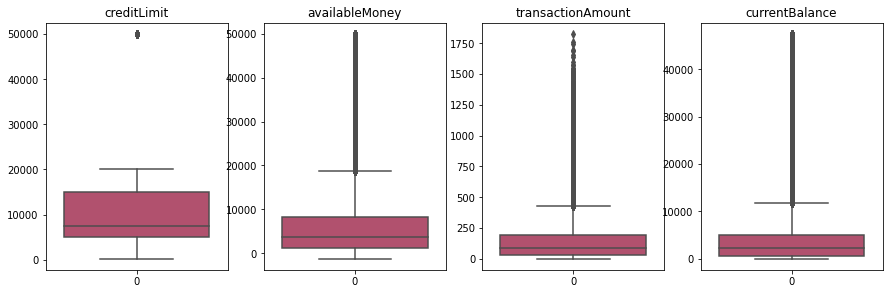

In [27]:
# Box Plots help analyzing the Outliers in the datasets and the skewness

plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = sns.boxplot(data=df['creditLimit'],palette="flare")
fig.set_title('creditLimit')

plt.subplot(2, 4, 2)
fig = sns.boxplot(data=df['availableMoney'],palette="flare")
fig.set_title('availableMoney')

plt.subplot(2, 4, 3)
fig = sns.boxplot(data=df['transactionAmount'],palette="flare")
fig.set_title('transactionAmount')

plt.subplot(2, 4, 4)
fig = sns.boxplot(data=df['currentBalance'],palette="flare")
fig.set_title('currentBalance')

Plot Heatmap to see Correlation Matrix between these 4 Numerical Attributes.

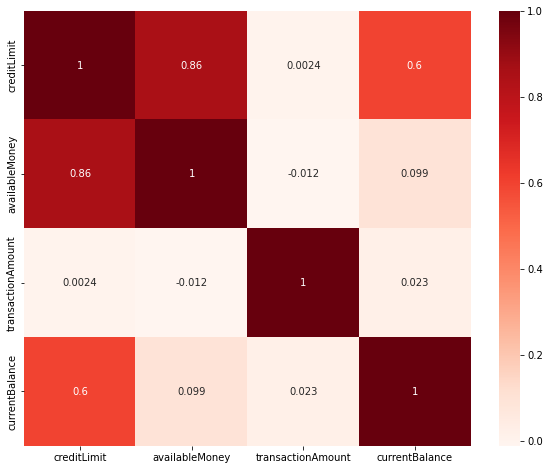

In [28]:
num_c = ['creditLimit','availableMoney','transactionAmount','currentBalance']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_c].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Data Wrangling

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [30]:
# Drop empty column, merchantName, and 3 date variables

df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises',
                      'recurringAuthInd','merchantName','currentExpDate','accountOpenDate','dateOfLastAddressChange'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   acqCountry                638001 non-null  object 
 7   merchantCountryCode       641290 non-null  object 
 8   posEntryMode              638569 non-null  float64
 9   posConditionCode          641627 non-null  float64
 10  merchantCategoryCode      641914 non-null  object 
 11  cardCVV                   641914 non-null  int64  
 12  enteredCVV                641914 non-null  int64  
 13  cardLast4Digits           641914 non-null  i

Matched CVV

In [32]:
# Make new column named 'matchedCVV' with the values are if cardCVV is equal to enteredCVV

df['matchedCVV'] = df['cardCVV'].eq(df['enteredCVV'])

In [33]:
df['matchedCVV'].value_counts()

True     635977
False      5937
Name: matchedCVV, dtype: int64

In [34]:
# Drop cardCVV and enteredCVV

df = df.drop(columns=['cardCVV','enteredCVV'])

Transaction Date Time

In [35]:
# convert 'transactionDateTime' into datetime format

df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime']

0        2016-01-08 19:04:50
1        2016-01-09 22:32:39
2        2016-01-11 13:36:55
3        2016-01-11 22:47:46
4        2016-01-16 01:41:11
                 ...        
641909   2016-12-04 12:29:21
641910   2016-12-09 04:20:35
641911   2016-12-16 07:58:23
641912   2016-12-19 02:30:35
641913   2016-12-28 11:14:14
Name: transactionDateTime, Length: 641914, dtype: datetime64[ns]

In [36]:
# Extracting duplicate transactions
Duplicated = (df.sort_values(['transactionDateTime']).groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime'].diff().dt.total_seconds().lt(600))

In [37]:
# make new column 'multiSwipe'

df['multiSwipe'] = Duplicated

In [38]:
# extract transactionDateTime into year,month,week,day,hour,and minute

df['transaction_year'] = df['transactionDateTime'].dt.year
df['transaction_month'] = df['transactionDateTime'].dt.month
df['transaction_week'] = df['transactionDateTime'].dt.weekday
df['transaction_day'] = df['transactionDateTime'].dt.day
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_minute'] = df['transactionDateTime'].dt.minute

In [39]:
# drop transactionDateTime

df = df.drop(columns=['transactionDateTime'])

In [40]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,False,True,False,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,5,16,1,41


In [41]:
# drop accountNumber and customerId

df = df.drop(columns=['accountNumber','customerId'])

In [42]:
# show unique values acqCountry dan merchantCountryCode

df['acqCountry'].unique()

array(['US', nan, 'PR', 'MEX', 'CAN'], dtype=object)

In [43]:
df['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', nan, 'CAN'], dtype=object)

In [44]:
# Same label column handling (US,MEX,PR,CAN)

cols = []
for column in df.merchantCountryCode:
    if column == 'MEX':
      cols.append(f'MEX_{1}')
      continue
    elif column == 'US':
      cols.append(f'US_{1}')
      continue
    elif column == 'PR':
      cols.append(f'PR_{1}')
      continue 
    elif column == 'CAN':
      cols.append(f'CAN_{1}')
      continue 
    cols.append(column)
df.merchantCountryCode = cols

In [45]:
df['merchantCountryCode'].unique()

array(['US_1', 'PR_1', 'MEX_1', nan, 'CAN_1'], dtype=object)

In [46]:
# Check missing values

df.isnull().sum()

creditLimit                    0
availableMoney                 0
transactionAmount              0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
matchedCVV                     0
multiSwipe                     0
transaction_year               0
transaction_month              0
transaction_week               0
transaction_day                0
transaction_hour               0
transaction_minute             0
dtype: int64

In [47]:
df.shape

(641914, 22)

In [48]:
# drop row with null values
df = df.dropna()
 
# reset index
df = df.reset_index(drop = True)

In [49]:
# Check missing values

df.isnull().sum()

creditLimit                 0
availableMoney              0
transactionAmount           0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
matchedCVV                  0
multiSwipe                  0
transaction_year            0
transaction_month           0
transaction_week            0
transaction_day             0
transaction_hour            0
transaction_minute          0
dtype: int64

In [50]:
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardLast4Digits,transactionType,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,5000,5000.00,111.33,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,4,8,19,4
1,5000,4888.67,24.75,US,US_1,9.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,5,9,22,32
2,5000,4863.92,187.40,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,13,36
3,5000,4676.52,227.34,US,US_1,2.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,22,47
4,5000,4449.18,0.00,US,US_1,2.0,1.0,rideshare,9184,ADDRESS_VERIFICATION,...,False,False,True,False,2016,1,5,16,1,41


In [51]:
# Convert column 'isFraud','cardPresent','expirationDateKeyInMatch' (Boolean) into str
# and convert column 'posEntryMode','posConditionCode' (int) into str

cnv_obj = ['posEntryMode','posConditionCode']

df[cnv_obj]=df[cnv_obj].astype(str)

In [52]:
# refresh variable boolean

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

5 boolean variables



In [53]:
boolean

['isFraud',
 'cardPresent',
 'expirationDateKeyInMatch',
 'matchedCVV',
 'multiSwipe']

In [54]:
le = LabelEncoder()

In [55]:
for col in boolean:
    df[col]=le.fit_transform(df[col])

In [56]:
df[boolean].head()

,isFraud,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe
0,1,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,1,0
4,0,0,0,1,0


In [57]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

16 numerical variables



In [58]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

6 categorical variables



In [59]:
categorical

['acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType']

In [60]:
df = pd.concat([df[numerical],
                     pd.get_dummies(df.acqCountry,drop_first=True), 
                     pd.get_dummies(df.merchantCountryCode,drop_first=True),
                     pd.get_dummies(df.posEntryMode,drop_first=True),
                     pd.get_dummies(df.posConditionCode,drop_first=True),
                     pd.get_dummies(df.merchantCategoryCode,drop_first=True),
                     pd.get_dummies(df.transactionType,drop_first=True)], axis=1)

In [61]:
df.head()

,creditLimit,availableMoney,transactionAmount,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,...,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,PURCHASE,REVERSAL
0,5000,5000.00,111.33,9184,1,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5000,4888.67,24.75,9184,0,111.33,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,5000,4863.92,187.40,9184,0,136.08,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,5000,4676.52,227.34,9184,1,323.48,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,5000,4449.18,0.00,9184,0,550.82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Classification Model

In [161]:
def resampling(data,sampling_method) :
  X = data.drop(['isFraud'], axis=1)
  y = data['isFraud']

  X, y  = sampling_method.fit_resample(X, y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  cols = X_train.columns
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  X_train = pd.DataFrame(X_train, columns=[cols])
  X_test = pd.DataFrame(X_test, columns=[cols])

  return X_train,X_test,y_train, y_test 

## UnderSampling

In [162]:
X_train,X_test,y_train,y_test  = resampling(df,RandomUnderSampler())

Logistic Regression

In [178]:
accuracy= []
recall =[]
auc= []
precision = []
tp = []
tn = []
fp = []
fn = []


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]

cm = confusion_matrix(y_test, y_pred)

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))
tp.append(cm[0,0])
tn.append(cm[1,1])
fp.append(cm[0,1])
fn.append(cm[1,0])

model_names = ['LogisticRegression_UnderSampling']
underlog = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision,'TP':tp,'TN':tn,'FP':fp,'FN':fn}, index=model_names)
underlog

,Accuracy,Recall,ROC_AUC,Precision,TP,TN,FP,FN
LogisticRegression_UnderSampling,0.68,0.72,0.74,0.66,1385,1561,803,608


Gradient Boosting

In [179]:
accuracy= []
recall =[]
auc= []
precision = []
tp = []
tn = []
fp = []
fn = []


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]

cm = confusion_matrix(y_test, y_pred)

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))
tp.append(cm[0,0])
tn.append(cm[1,1])
fp.append(cm[0,1])
fn.append(cm[1,0])


model_names = ['GradientBoosting_UnderSampling']
undergb = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision,'TP':tp,'TN':tn,'FP':fp,'FN':fn}, index=model_names)
undergb

,Accuracy,Recall,ROC_AUC,Precision,TP,TN,FP,FN
GradientBoosting_UnderSampling,0.69,0.72,0.76,0.68,1446,1556,742,613


XGBoost Classifier

In [180]:
accuracy= []
recall =[]
auc= []
precision = []
tp = []
tn = []
fp = []
fn = []


xgbc_base = XGBClassifier(random_state=0)
xgbc_base.fit(X_train,y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = xgbc_base.predict_proba(X_test)[::,1]

cm = confusion_matrix(y_test, y_pred)

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))
tp.append(cm[0,0])
tn.append(cm[1,1])
fp.append(cm[0,1])
fn.append(cm[1,0])

model_names = ['XGBoost_UnderSampling']
underxgbc = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision,'TP':tp,'TN':tn,'FP':fp,'FN':fn}, index=model_names)
underxgbc

,Accuracy,Recall,ROC_AUC,Precision,TP,TN,FP,FN
XGBoost_UnderSampling,0.69,0.72,0.76,0.68,1435,1565,753,604


Random Forest

In [182]:
accuracy= []
recall =[]
auc= []
precision = []
tp = []
tn = []
fp = []
fn = []


rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_prob = rf.predict_proba(X_test)[::,1]

cm = confusion_matrix(y_test, y_pred)

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))
tp.append(cm[0,0])
tn.append(cm[1,1])
fp.append(cm[0,1])
fn.append(cm[1,0])

model_names = ['RandomForest_UnderSampling']
underrf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision,'TP':tp,'TN':tn,'FP':fp,'FN':fn}, index=model_names)
underrf

,Accuracy,Recall,ROC_AUC,Precision,TP,TN,FP,FN
RandomForest_UnderSampling,0.7,0.73,0.76,0.69,1459,1591,729,578


## OverSampling

In [183]:
X_train,X_test,y_train,y_test  = resampling(df,RandomOverSampler())

Logistic Regression

Gradient Boosting

XGBoost Classifier

Random Forest

## SMOTE

Logistic Regression

Gradient Boosting

XGBoost Classifier

Random Forest

## Feature Selection

# Final Result

In [84]:
# view the feature scores

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

transactionAmount           0.167931
cardLast4Digits             0.090591
currentBalance              0.088072
availableMoney              0.087092
transaction_minute          0.078871
transaction_day             0.071248
transaction_hour            0.068782
transaction_month           0.056431
transaction_week            0.047554
creditLimit                 0.044668
5.0                         0.040337
9.0                         0.021529
fuel                        0.011009
8.0                         0.010913
cardPresent                 0.010212
online_retail               0.008733
food                        0.008369
fastfood                    0.007683
entertainment               0.006909
hotels                      0.006649
mobileapps                  0.006339
rideshare                   0.005920
online_gifts                0.004979
PURCHASE                    0.004059
personal care               0.004058
auto                        0.003922
online_subscriptions        0.003491
9

In [85]:
feature_scores = feature_scores.to_frame('feature_scores').reset_index()

In [86]:
feature_scores

,level_0,feature_scores
0,transactionAmount,0.167931
1,cardLast4Digits,0.090591
2,currentBalance,0.088072
3,availableMoney,0.087092
4,transaction_minute,0.078871
5,transaction_day,0.071248
6,transaction_hour,0.068782
7,transaction_month,0.056431
8,transaction_week,0.047554
9,creditLimit,0.044668


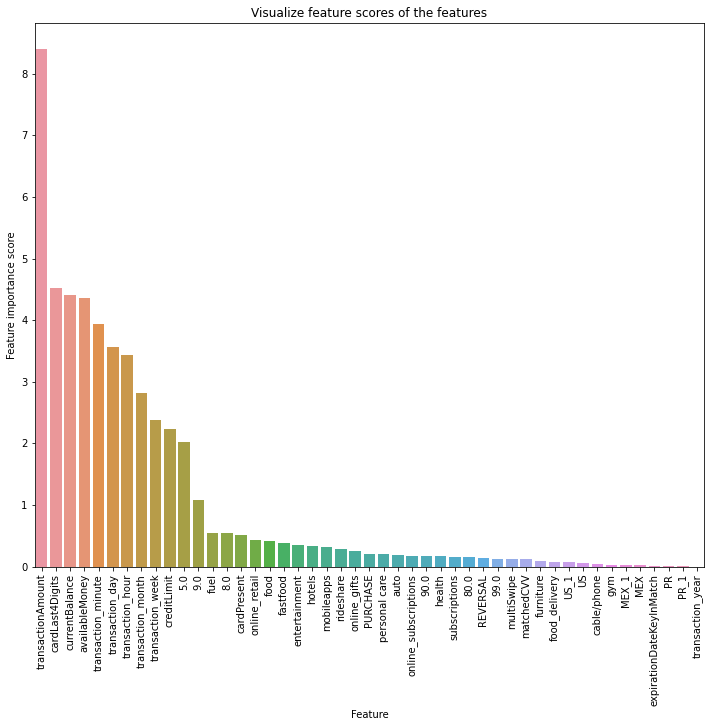

In [87]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(data=feature_scores, x='level_0',y='feature_scores')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel("Feature")
ax.set_ylabel("Feature importance score")
plt.show()

In [88]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['transaction_year'], axis=1)

X_test = X_test.drop(['transaction_year'], axis=1)

In [89]:
accuracy= []
recall =[]
auc= []
precision = []


rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
threshold = 0.5

y_pred_prob = rf.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Random Forest']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df5

,Accuracy,Recall,AUC,Precision
Random Forest,0.6909,0.718,0.7574,0.6853


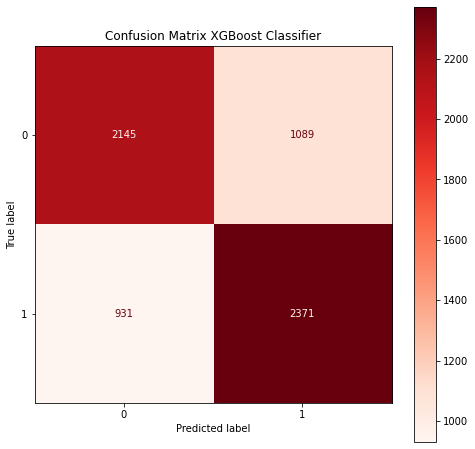

In [90]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix XGBoost Classifier')
plot_confusion_matrix(rf, X_test,y_test, cmap=plt.cm.Reds, ax=ax);

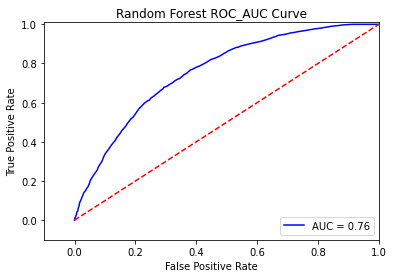

In [91]:
fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Random Forest ROC_AUC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      3234
           1       0.69      0.72      0.70      3302

    accuracy                           0.69      6536
   macro avg       0.69      0.69      0.69      6536
weighted avg       0.69      0.69      0.69      6536



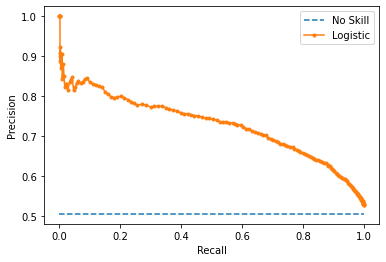

In [93]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
# lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()